In [299]:
import numpy as pd
import pandas as pd
import seaborn as sns

In [300]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [301]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [302]:
df.dropna(inplace=True)

In [303]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [304]:
from sklearn.preprocessing import LabelEncoder
lb1=LabelEncoder()
df["embark_town"]=lb1.fit_transform(df["embark_town"])
df["sex"]=lb1.fit_transform(df["sex"])
df["class"]=lb1.fit_transform(df["class"])
df["embarked"]=lb1.fit_transform(df["embarked"])
df["who"]=lb1.fit_transform(df["who"])
df["deck"]=lb1.fit_transform(df["deck"])

In [305]:
x=df.drop("alive",axis=1)
y=df["alive"]

In [324]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [329]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [308]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [309]:
y_pred= classifier.predict(x_test)
y_pred

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [310]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.972972972972973

In [311]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix( y_pred,y_test)
print(confusion_matrix( y_pred,y_test))
c_m[0,0]

[[ 9  0]
 [ 1 27]]


9

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


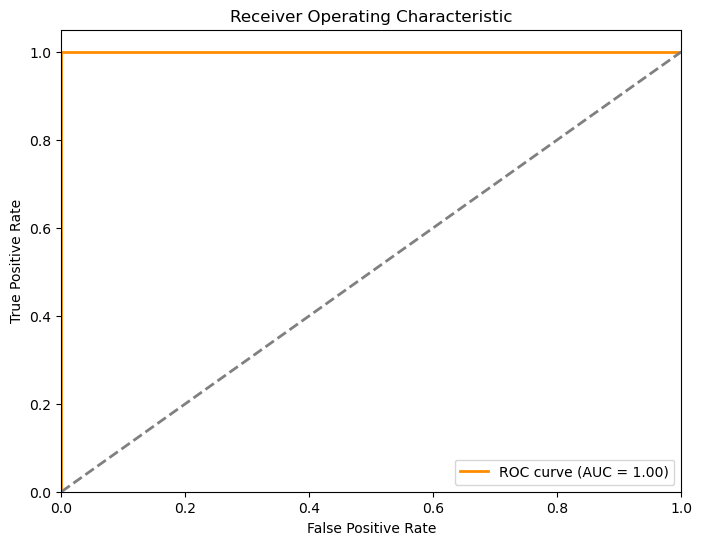

In [312]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = dt_classifier.predict_proba(x_test)[:, 1]
y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='yes')
fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [313]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
c_m

              precision    recall  f1-score   support

          no       1.00      0.90      0.95        10
         yes       0.96      1.00      0.98        27

    accuracy                           0.97        37
   macro avg       0.98      0.95      0.96        37
weighted avg       0.97      0.97      0.97        37



array([[ 9,  0],
       [ 1, 27]], dtype=int64)

In [314]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [315]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix( y_pred,y_test)
print(confusion_matrix( y_pred,y_test))
c_m[0,0]

[[10  0]
 [ 0 27]]


10

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


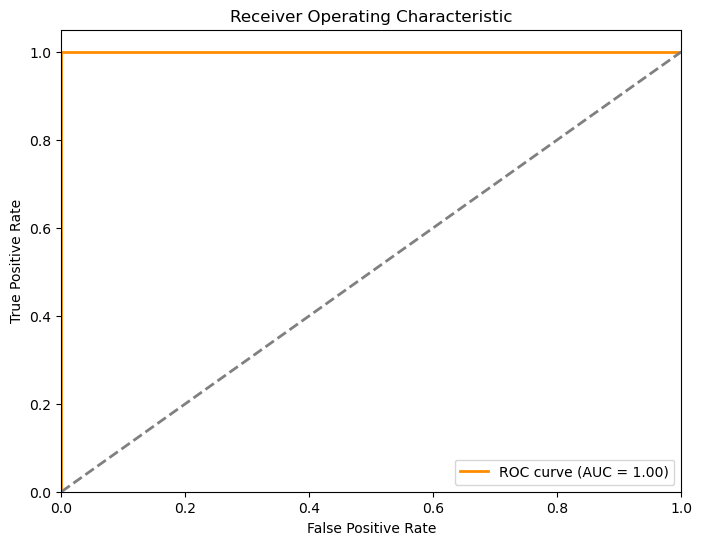

In [316]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = dt_classifier.predict_proba(x_test)[:, 1]
y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='yes')
fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [317]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
c_m

              precision    recall  f1-score   support

          no       1.00      1.00      1.00        10
         yes       1.00      1.00      1.00        27

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



array([[10,  0],
       [ 0, 27]], dtype=int64)

In [318]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [319]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix( y_pred,y_test)
print(confusion_matrix( y_pred,y_test))
c_m[0,0]

[[10  0]
 [ 0 27]]


10

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


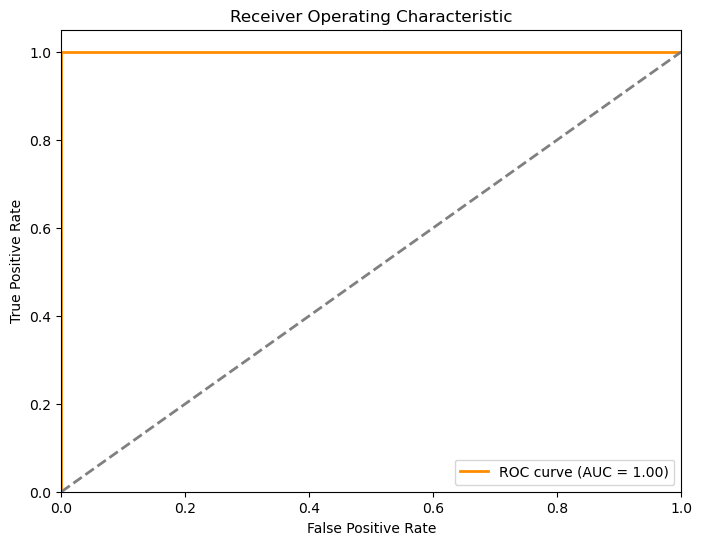

In [320]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = dt_classifier.predict_proba(x_test)[:, 1]
y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='yes')
fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [321]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
c_m

              precision    recall  f1-score   support

          no       1.00      1.00      1.00        10
         yes       1.00      1.00      1.00        27

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



array([[10,  0],
       [ 0, 27]], dtype=int64)

In [325]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7027027027027027

In [326]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix( y_pred,y_test)
print(confusion_matrix( y_pred,y_test))
c_m[0,0]

[[ 7  8]
 [ 3 19]]


7

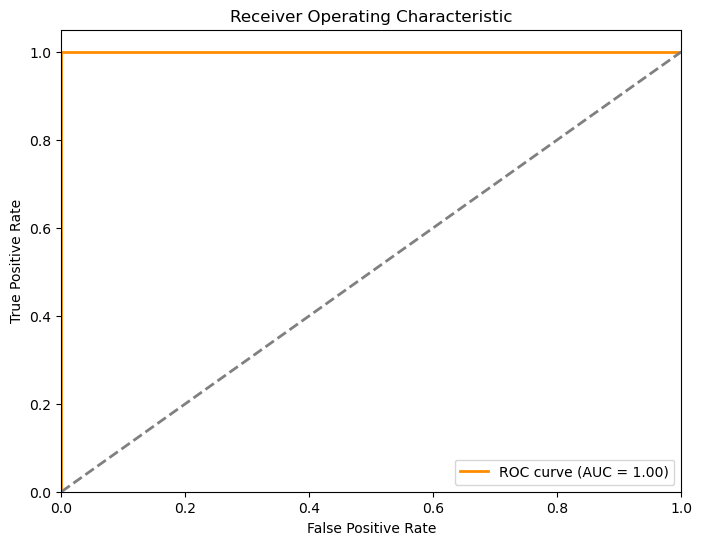

In [327]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = dt_classifier.predict_proba(x_test)[:, 1]
y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='yes')
fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [328]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
c_m

              precision    recall  f1-score   support

          no       0.47      0.70      0.56        10
         yes       0.86      0.70      0.78        27

    accuracy                           0.70        37
   macro avg       0.67      0.70      0.67        37
weighted avg       0.76      0.70      0.72        37



array([[ 7,  8],
       [ 3, 19]], dtype=int64)

In [330]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [331]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0],
       [ 0, 27]], dtype=int64)

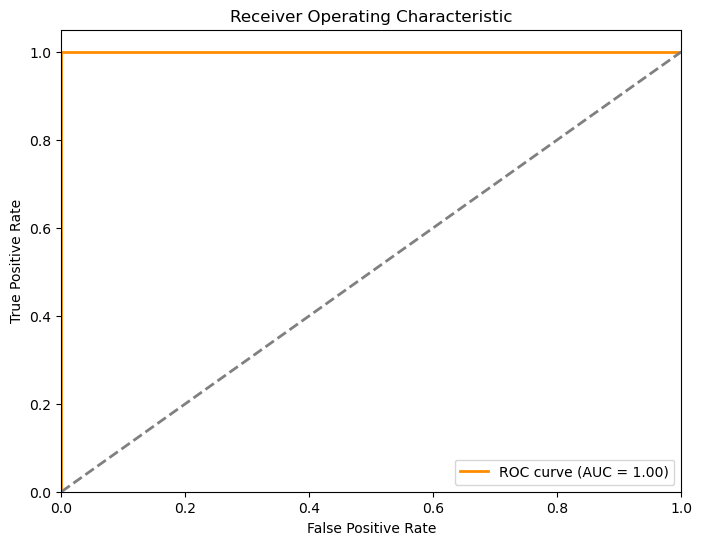

In [332]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = dt_classifier.predict_proba(x_test)[:, 1]
y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='yes')
fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
roc_auc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [333]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
c_m

              precision    recall  f1-score   support

          no       1.00      1.00      1.00        10
         yes       1.00      1.00      1.00        27

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



array([[ 7,  8],
       [ 3, 19]], dtype=int64)

In [334]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters={"n_neighbors":[1,3,5,7,9,11,13,15,17,19]}
model=GridSearchCV(classifier,parameters)
model.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]})

In [335]:
model.best_params_

{'n_neighbors': 3}